In [1]:
from tsfresh.examples import load_driftbif
from tsfresh.feature_extraction import ComprehensiveFCParameters, extract_features
from tsfresh.feature_extraction.settings import get_combiner_functions, get_simple_functions
import pandas as pd
import pprint
import timeit
from tqdm import tqdm
import matplotlib.pylab as plt
import seaborn as sns

/Users/max/Documents/tsfresh/venv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/max/Documents/tsfresh/venv/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load data
X, _ = load_driftbif(10, 1000)
X.drop("dimension", axis=1, inplace=True)
X.head()

,id,time,value
0,0,0.00,0.000000
1,0,0.05,0.000118
2,0,0.10,0.000184
3,0,0.15,0.000309
4,0,0.20,0.000373


In [3]:
# get all the parameters and respective functions
settings = ComprehensiveFCParameters()

In [4]:
# compare performance of tsfresh for simple feature calculator that are calculated individually
res  = pd.DataFrame()
n_ts = 20
l_ts = 1000
n_ti = 3

for f, param in tqdm(settings.items()):
    res.loc[f, "feature"] = f
    res.loc[f, "n_samp"] = n_ts
    res.loc[f, "length"] = l_ts
    
    fc_dict = {f:param}
    
    t = timeit.timeit(lambda : extract_features(timeseries_container=X, 
                                                column_id="id",
                                                n_jobs=0, 
                                                default_fc_parameters=fc_dict, 
                                                disable_progressbar=True), 
                      number=n_ti)
    n_fs = len(param) if param is not None else 1
    res.loc[f, "n_fs"] = n_fs
    res.loc[f, "t_abs"] = t * 1.0/n_fs
    res.loc[f, "t_1ts"] = t*1.0/(n_ts*n_fs)

100%|██████████| 61/61 [10:37<00:00, 10.44s/it]   


In [5]:
res

,feature,n_samp,length,n_fs,t_abs,t_1ts
agg_linear_trend,agg_linear_trend,20.0,1000.0,48.0,0.165438,0.008272
binned_entropy,binned_entropy,20.0,1000.0,1.0,0.040902,0.002045
median,median,20.0,1000.0,1.0,0.035762,0.001788
first_location_of_maximum,first_location_of_maximum,20.0,1000.0,1.0,0.031573,0.001579
mean_second_derivate_central,mean_second_derivate_central,20.0,1000.0,1.0,0.036605,0.001830
absolute_sum_of_changes,absolute_sum_of_changes,20.0,1000.0,1.0,0.030932,0.001547
minimum,minimum,20.0,1000.0,1.0,0.037429,0.001871
count_above_mean,count_above_mean,20.0,1000.0,1.0,0.042220,0.002111
number_cwt_peaks,number_cwt_peaks,20.0,1000.0,2.0,3.162668,0.158133
has_duplicate_min,has_duplicate_min,20.0,1000.0,1.0,0.304100,0.015205


In [6]:
res["feature"] = res.feature.astype(str)
res = res.sort_values(by="feature")

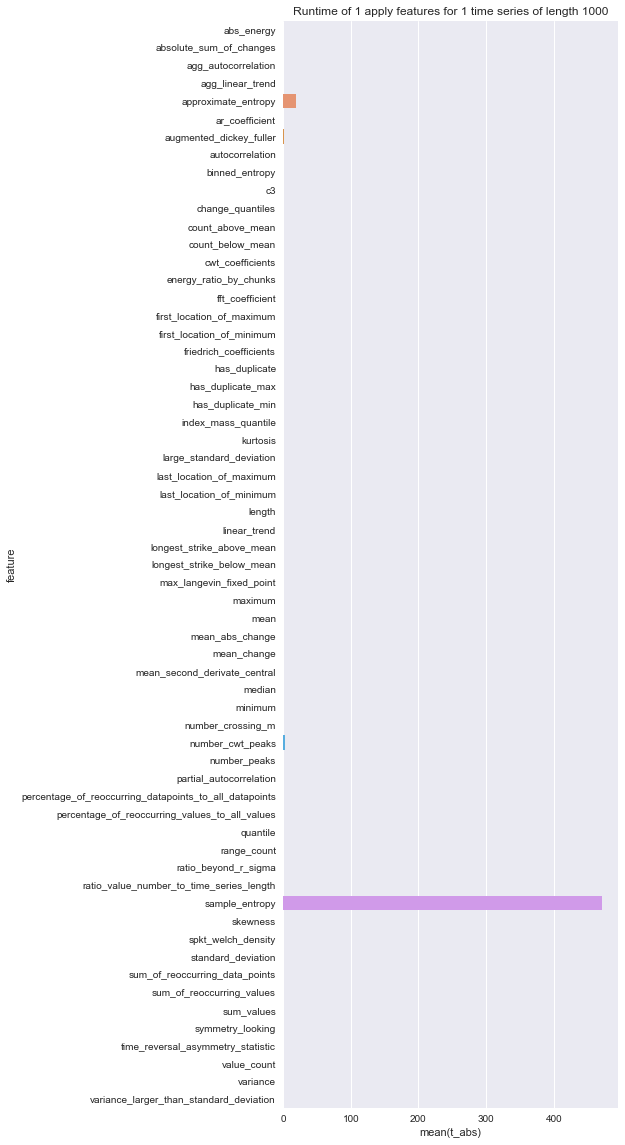

In [7]:
plt.figure(figsize=(6, 20))
sns.barplot(y="feature", x="t_abs", data=res)
plt.title("Runtime of 1 apply features for 1 time series of length 1000")
plt.show()

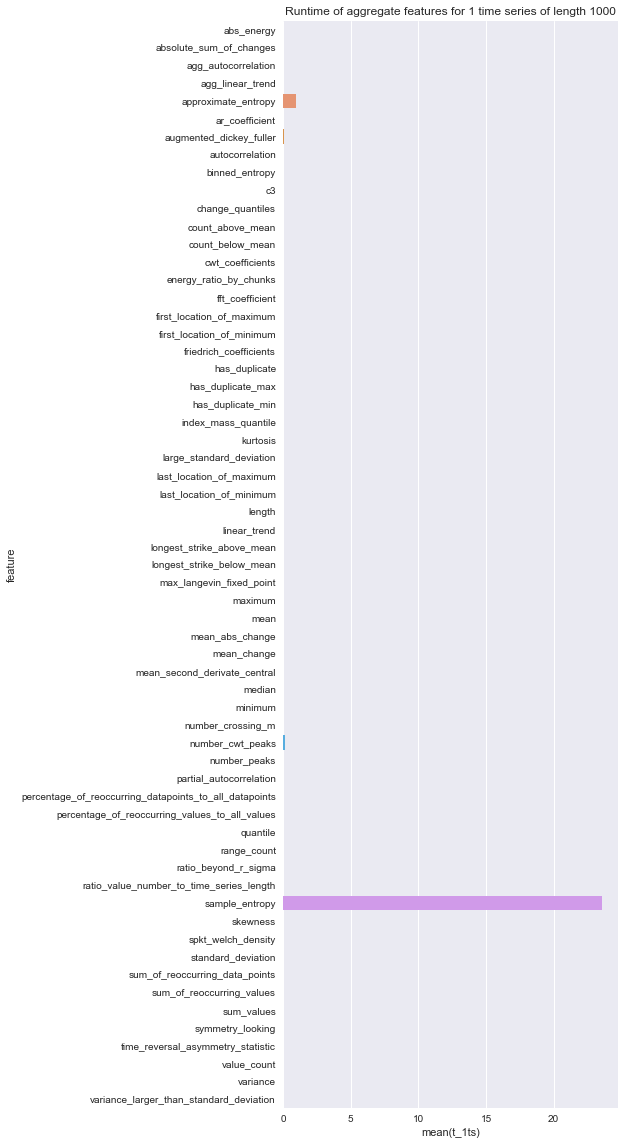

In [8]:
plt.figure(figsize=(6,20))
sns.barplot(y="feature", x="t_1ts", data=res)
plt.title("Runtime of aggregate features for 1 time series of length 1000")
plt.show()

sample_entropy and approximate_entropy make up for most of the runtime, we create the following plots without them

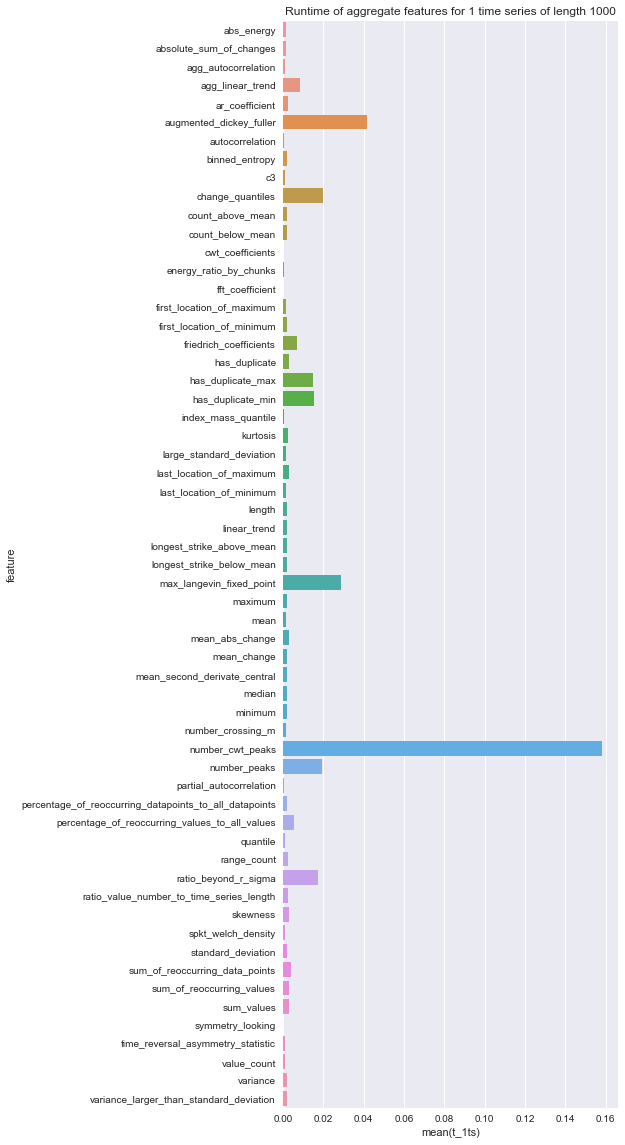

In [19]:
plt.figure(figsize=(6,20))
sns.barplot(y="feature", x="t_1ts", data=res.drop(["sample_entropy", "approximate_entropy"]))
plt.title("Runtime of aggregate features for 1 time series of length 1000")
plt.show()

In [20]:
# we calculate how much many features cause 90% of the runtime 
r = res.t_1ts.copy()
r.sort_values(ascending=True, inplace=True)
r

fft_coefficient                                            0.000027
cwt_coefficients                                           0.000093
symmetry_looking                                           0.000133
energy_ratio_by_chunks                                     0.000216
autocorrelation                                            0.000369
partial_autocorrelation                                    0.000385
index_mass_quantile                                        0.000401
c3                                                         0.000738
value_count                                                0.000846
spkt_welch_density                                         0.000864
time_reversal_asymmetry_statistic                          0.000932
quantile                                                   0.001050
agg_autocorrelation                                        0.001073
large_standard_deviation                                   0.001209
number_crossing_m                               

In [24]:
# in percentage
r / r.sum()*100

fft_coefficient                                            0.000109
cwt_coefficients                                           0.000374
symmetry_looking                                           0.000533
energy_ratio_by_chunks                                     0.000865
autocorrelation                                            0.001479
partial_autocorrelation                                    0.001540
index_mass_quantile                                        0.001605
c3                                                         0.002956
value_count                                                0.003390
spkt_welch_density                                         0.003459
time_reversal_asymmetry_statistic                          0.003733
quantile                                                   0.004203
agg_autocorrelation                                        0.004295
large_standard_deviation                                   0.004841
number_crossing_m                               